Importando las librerias necesaraias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importando el dataset y mostrando las primeras 10 filas:

In [2]:
df = pd.read_csv('spotify_top_1000_tracks.csv')
#print(df.head())

Mostrando un resumen general del dataset y revisando si hay valores nulos:

In [3]:
print(df.describe())
print(df.isnull().sum())
print(df.dtypes)
#cambiando el tipo de dato de la columna fecha a datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

        popularity  duration_min
count  1000.000000   1000.000000
mean     56.669000      3.318516
std      28.192805      0.849591
min       0.000000      0.969150
25%      37.000000      2.754021
50%      68.000000      3.293833
75%      79.000000      3.745721
max      97.000000      9.497883
track_name      0
artist          0
album           0
release_date    0
popularity      0
spotify_url     0
id              0
duration_min    0
dtype: int64
track_name       object
artist           object
album            object
release_date     object
popularity        int64
spotify_url      object
id               object
duration_min    float64
dtype: object


Mostrando el top 10 de artistas con más canciones:

C:\Users\charl\AppData\Local\Temp\ipykernel_11580\2510336542.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.head(10).values, y = top_artists.head(10).index, palette="magma")


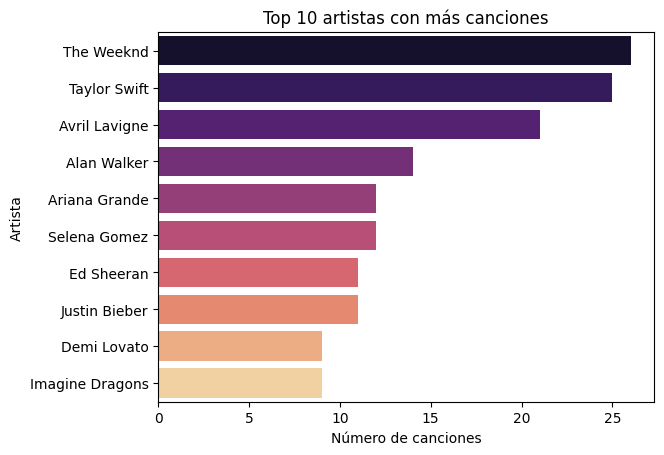

In [4]:
top_artists = df['artist'].value_counts()
#print(top_artists.head(10)) #imprime la lista del top 10

#Graficando el resultado
plt.Figure(figsize=(10,5))
sns.barplot(x=top_artists.head(10).values, y = top_artists.head(10).index, palette="magma")
plt.xlabel("Número de canciones")
plt.ylabel("Artista")
plt.title("Top 10 artistas con más canciones")
plt.show()

Calculando la duración promedio de las canciones y la cancion con mayor y menor duración

In [5]:
#promedio de duración
avg_duration = df['duration_min'].mean()
print(f"La duración promedio de las canciones es: {avg_duration:.2f} minutos.")

#la cancion con menor duracion
mas_corta = df.loc[df['duration_min'].idxmin()]
print(f"\nLa canción con menor duración es '{mas_corta['track_name']}' de {mas_corta['artist']} con {mas_corta['duration_min']:.2f} minutos.")

#la cancion con mayor duracion
mas_larga = df.loc[df['duration_min'].idxmax()]
print(f"\nLa canción con mayor duración es '{mas_larga['track_name']}' de {mas_larga['artist']} con {mas_larga['duration_min']:.2f} minutos.")

La duración promedio de las canciones es: 3.32 minutos.

La canción con menor duración es 'Bezos I' de Bo Burnham con 0.97 minutos.

La canción con mayor duración es 'Lost Boy' de Jaden con 9.50 minutos.


Mostrando la distribucion de popularidad

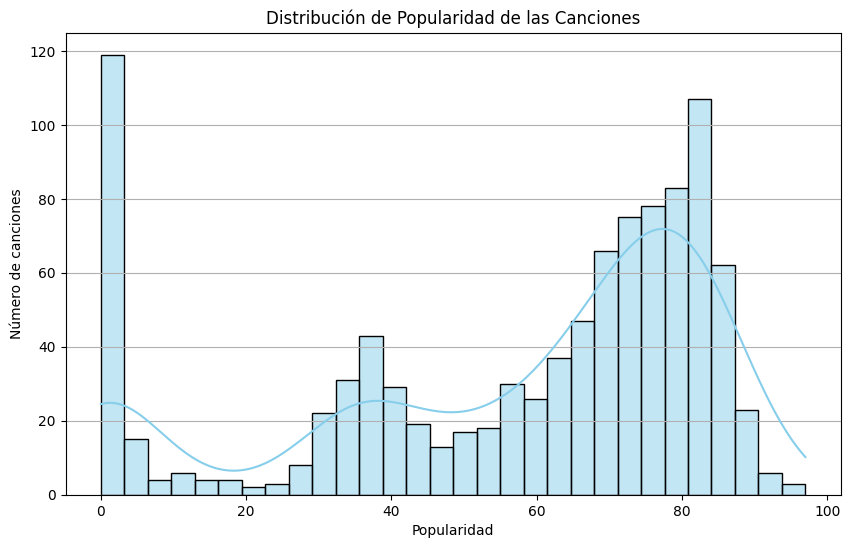

In [6]:
# Crear el histograma
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')

# Personalizar el gráfico
plt.title('Distribución de Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Número de canciones')
plt.grid(axis='y')
plt.show()

jj

In [7]:
# Agrupar por artista y sumar la duración de todas sus canciones
duracion_total_artista = df.groupby('artist')['duration_min'].sum()

# Ordenar de mayor a menor duración
duracion_total_artista_sorted = duracion_total_artista.sort_values(ascending=False)

# Mostrar el artista con más minutos acumulados
artista_top = duracion_total_artista_sorted.idxmax()
minutos_top = duracion_total_artista_sorted.max()

print(f"El artista con más minutos acumulados en el top es {artista_top} con {minutos_top:.2f} minutos.")


El artista con más minutos acumulados en el top es The Weeknd con 102.34 minutos.
